# Информация о датасете
Данный набор данных включает медицинскую информацию о 2149 пациентах, каждый из которых имеет уникальный идентификатор в диапазоне от 4751 до 6900. В наборе представлены демографические данные, факторы, связанные с образом жизни, медицинская история, клинические показатели, когнитивные и функциональные оценки, а также симптомы и диагноз болезни Альцгеймера.

* **PatientID**: уникальный идентификатор, присвоенный каждому пациенту (от 4751 до 6900).
* **Age**: возраст пациентов от 60 до 90 лет.
* **Gender**: пол пациента.
* **Ethnicity**: этническая принадлежность пациента.
* **EducationLevel**: уровень образования пациента.
* **BMI**: индекс массы тела пациента.
* **Smoking**: курящий ли пациент.
* **AlcoholConsumption**: еженедельное потребление алкоголя пациентом в единицах измерения.
* **PhysicalActivity**: еженедельная физическая активность пациента в часах, от 0 до 10.
* **DietQuality**: оценка качества диеты пациента от 0 до 10 баллов.
* **SleepQuality**: оценка качества сна пациента от 4 до 10 баллов.
* **FamilyHistoryAlzheimers**: семейный анамнез болезни Альцгеймера, где 0 означает "Нет", а 1 - "Да".
* **CardiovascularDisease**: наличие сердечно-сосудистых заболеваний, где 0 означает "Нет", а 1 - "Да".
* **Diabetes**: наличие сахарного диабета, где 0 означает "Нет", а 1 - "Да".
* **Depression**: наличие депрессии, где 0 означает "Нет", а 1 - "Да".
* **HeadInjury**: травма головы в анамнезе, где 0 означает "Нет", а 1 - "Да".
* **Hypertension**: наличие артериальной гипертензии, где 0 означает "Нет", а 1 - "Да".
* **SystolicBP**: систолическое артериальное давление в диапазоне от 90 до 180 мм рт.ст.
* **DiastolicBP**: диастолическое артериальное давление в диапазоне от 60 до 120 мм рт.ст.
* **CholesterolTotal**: уровень общего холестерина - колеблется от 150 до 300 мг/дл.
* **CholesterolLDL**: уровень холестерина липопротеидов низкой плотности - колеблется от 50 до 200 мг/дл.
* **CholesterolHDL**: уровень холестерина липопротеидов высокой плотности - колеблется от 20 до 100 мг/дл.
* **CholesterolTriglycerides**: уровень триглицеридов - колеблется от 50 до 400 мг/дл.
* **MMSE**: оценка за мини-тест на психическое состояние - варьируется от 0 до 30. Более низкие баллы указывают на когнитивные нарушения.
* **FunctionalAssessment**: значение функциональной оценки - варьируется от 0 до 10. Более низкое значение указывают на более серьезные нарушения.
* **MemoryComplaints**: наличие проблем с памятью, где 0 означает "Нет", а 1 - "Да".
* **BehavioralProblems**: наличие проблем с поведением, где 0 означает "Нет", а 1 - "Да".
* **ADL**: оценка повседневной деятельности - варьируется от 0 до 10. Более низкие оценки указывают на более серьезные нарушения.
* **Confusion**: наличие путаницы, где 0 означает "Нет", а 1 - "Да".
* **Disorientation**: наличие дезориентации, где 0 означает "Нет", а 1 - "Да".
* **PersonalityChanges**: наличие личностных изменений, где 0 означает "Нет", а 1 - "Да".
* **DifficultyCompletingTasks**: наличие трудностей при выполнении заданий, где 0 означает "Нет", а 1 - "Да".
* **Forgetfulness**: наличие забывчивости, где 0 означает "Нет", а 1 - "Да".
* **Diagnosis**: статус диагноза болезни Альцгеймера, где 0 означает "Нет", а 1 - "Да".

На основе этого датасета будет прогнозироваться наличие болезни Альцгеймера у пациента.

# Загрузка файла

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, adjusted_rand_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering, MeanShift
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
uploaded = files.upload()

Saving alzheimer.csv to alzheimer.csv


In [44]:
data = pd.read_csv('alzheimer.csv')
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,male,caucasian,bachelors,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,male,caucasian,none,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,male,other,high_school,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,female,caucasian,high_school,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,male,caucasian,none,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid


# Обработка данных

In [45]:
# удаление лишнего признака
data.drop(columns=['DoctorInCharge'], inplace=True)
pd.set_option('future.no_silent_downcasting', True)
data['Ethnicity'] = data['Ethnicity'].replace({"caucasian": 0, "african_american": 1, "asian": 2, "other": 3})
data['EducationLevel'] = data['EducationLevel'].replace({"none": 0, "high_school": 1, "bachelors": 2, "higher": 3})
data['Gender'] = data['Gender'].replace({"male": 0, "female": 1})
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0


# Основные статические характеристики

In [46]:
data.describe()

,PatientID,Age,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,0.252210,0.144253,0.150768,0.200558,0.092601,0.148906,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,0.434382,0.351428,0.357906,0.400511,0.289940,0.356079,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Среднее

In [47]:
data.mean()

,0
PatientID,5825.0
Age,74.908795
Gender,0.506282
Ethnicity,0.697534
EducationLevel,1.286645
BMI,27.655697
Smoking,0.288506
AlcoholConsumption,10.039442
PhysicalActivity,4.920202
DietQuality,4.993138


# Стандартное отклонение (разброс) данных

In [48]:
data.std()

,0
PatientID,620.507185
Age,8.990221
Gender,0.500077
Ethnicity,0.996128
EducationLevel,0.904527
BMI,7.217438
Smoking,0.453173
AlcoholConsumption,5.75791
PhysicalActivity,2.857191
DietQuality,2.909055


# Гистограммы признаков

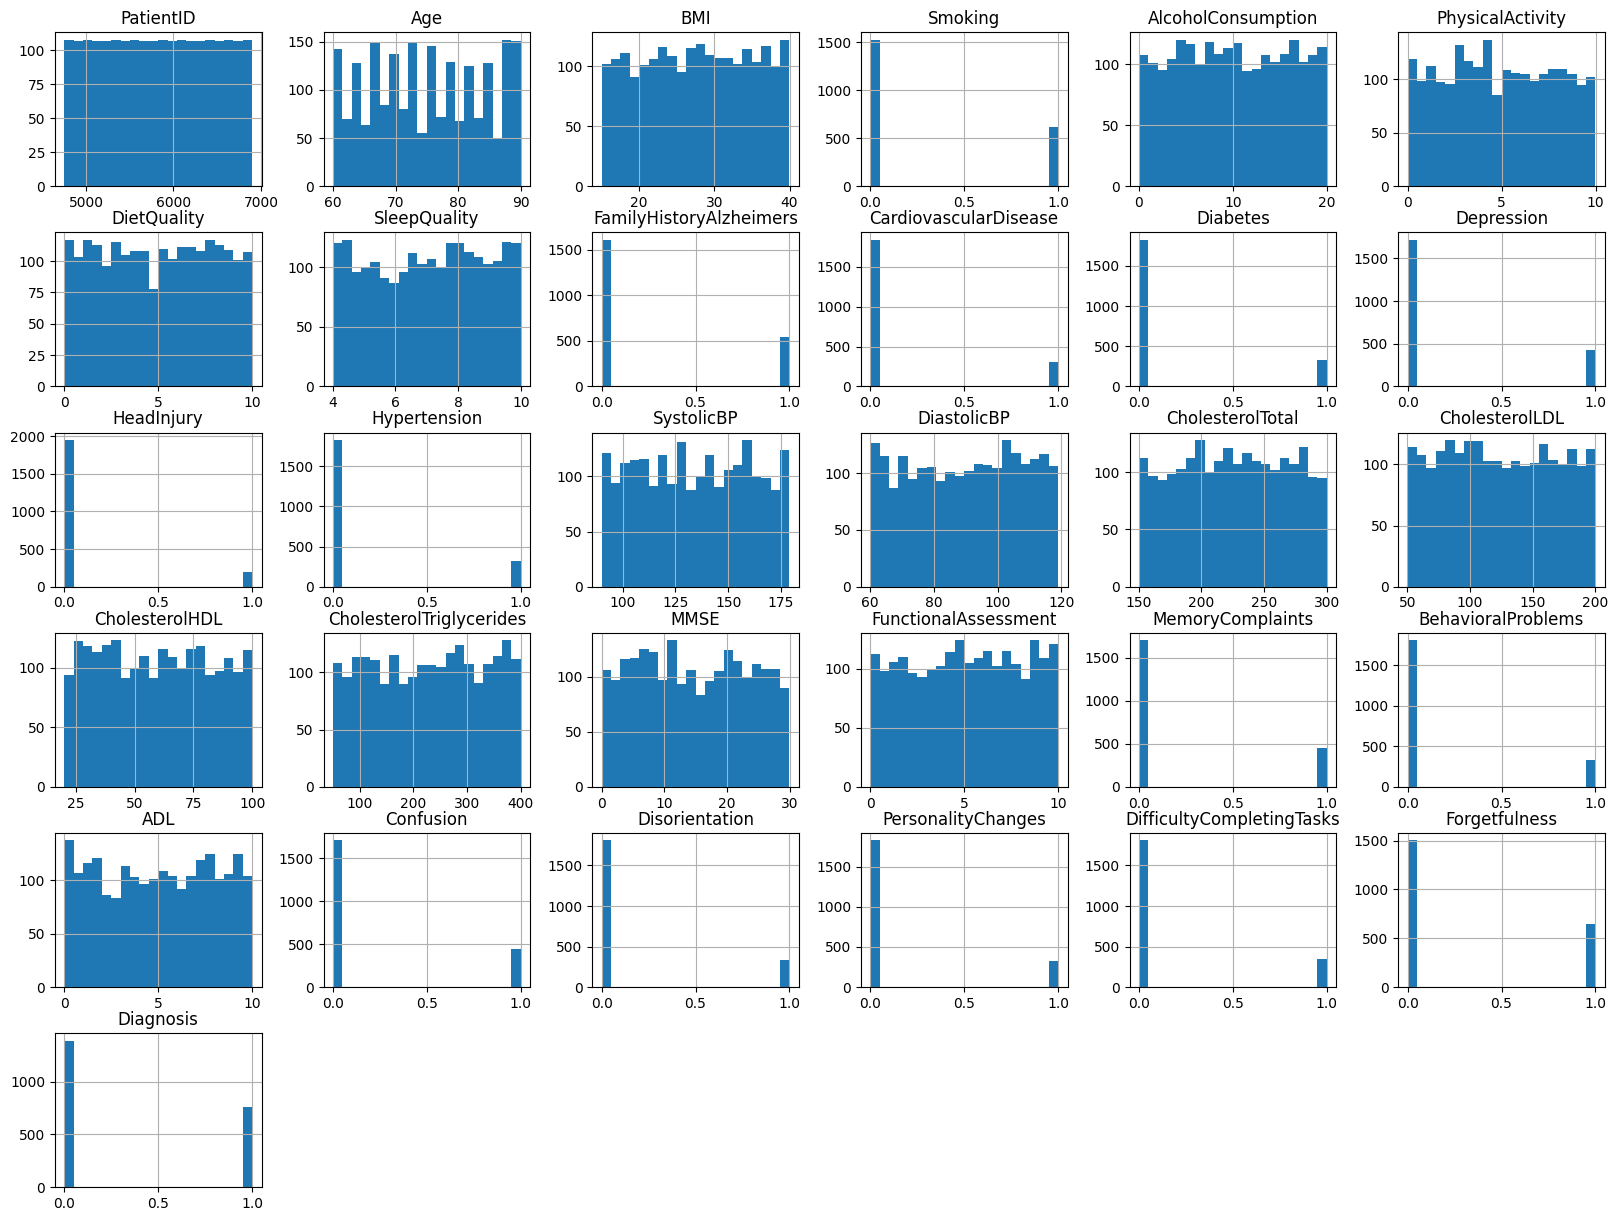

In [49]:
data.hist(bins=20, figsize=(20, 15))
plt.show()

# Корреляционная матрица

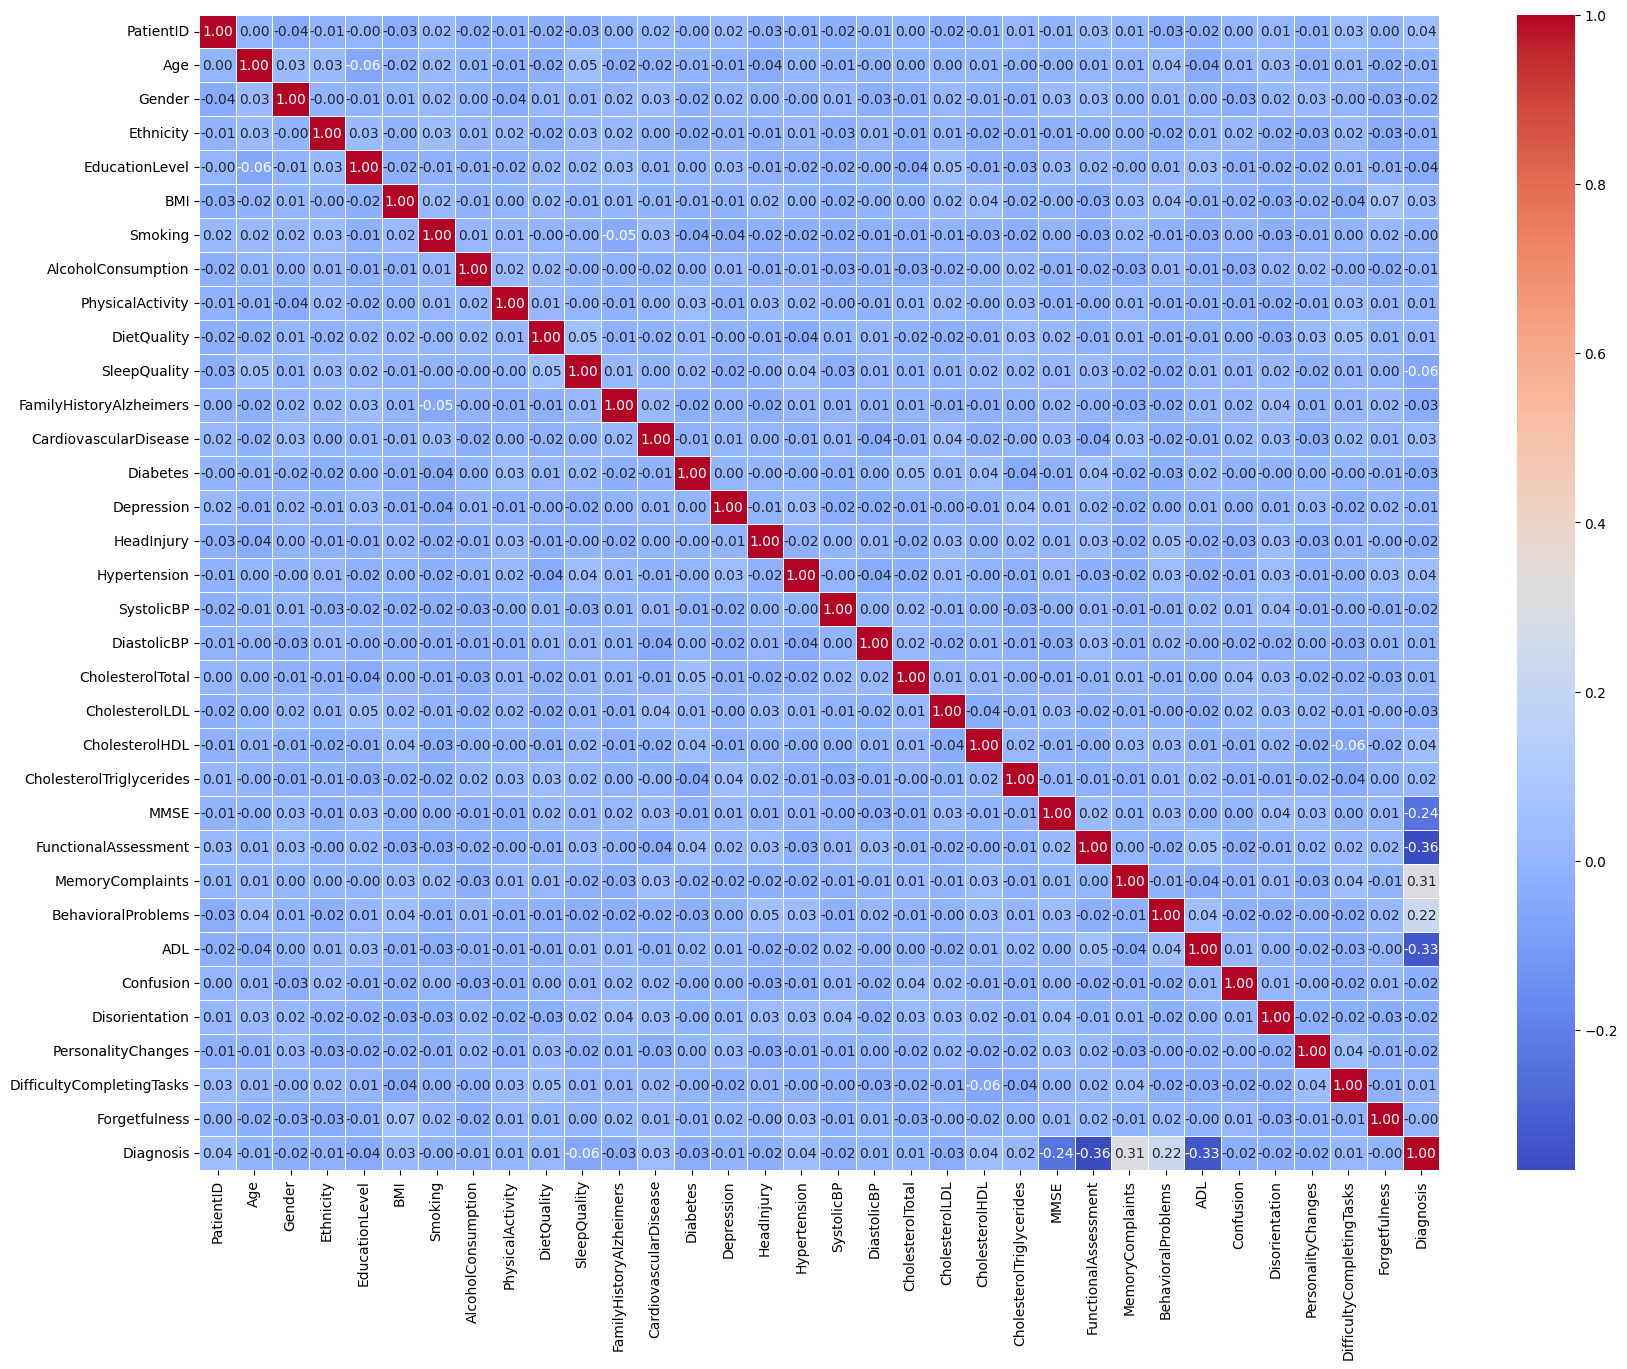

In [50]:
plt.figure(figsize=(20, 15))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

# Нормализация количественных признаков

In [51]:
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

scaler = StandardScaler()
X = data.drop(columns=['Diagnosis', 'PatientID'])
X_scaled = scaler.fit_transform(X_selected)

# Нелинейное снижение размерности с помощью t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

data_scaled = scaler.fit_transform(data.select_dtypes(include=[np.number]))
data_scaled = pd.DataFrame(data_scaled, columns=data.select_dtypes(include=[np.number]).columns)
data_scaled.describe()

,PatientID,Age,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03
mean,-5.290220e-17,5.819243e-16,3.967665e-16,-1.653194e-18,-3.637027e-17,-6.447456e-17,-2.124354e-16,-5.455540e-17,6.282137e-17,-2.314471e-17,5.868838e-17,-6.282137e-17,-2.314471e-17,-4.794262e-17,-5.488604e-16,6.612776e-18,-3.434510e-16,-2.545919e-16,7.935331e-17,9.092566e-17,-2.562451e-17,8.596608e-17,1.901173e-17,3.471707e-17,2.314471e-17,-1.983833e-17,-1.653194e-18,1.107640e-16,-8.596608e-17,1.058044e-16,-3.471707e-17
std,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00
min,-1.731245e+00,-1.658721e+00,-1.752670e+00,-6.367839e-01,-1.743649e+00,-1.721177e+00,-1.713585e+00,-1.728968e+00,-5.807533e-01,-4.105726e-01,-4.213481e-01,-5.008723e-01,-3.194547e-01,-4.182810e-01,-1.706211e+00,-1.697018e+00,-1.765814e+00,-1.709207e+00,-1.705734e+00,-1.744499e+00,-1.712875e+00,-1.756387e+00,-5.124765e-01,-4.312567e-01,-1.689224e+00,-5.081306e-01,-4.335310e-01,-4.213481e-01,-4.342881e-01,-6.570481e-01,-7.397001e-01
25%,-8.656225e-01,-8.799155e-01,-8.376512e-01,-6.367839e-01,-8.511373e-01,-8.225290e-01,-8.715108e-01,-8.893586e-01,-5.807533e-01,-4.105726e-01,-4.213481e-01,-5.008723e-01,-3.194547e-01,-4.182810e-01,-8.582086e-01,-9.010390e-01,-8.215998e-01,-8.566225e-01,-8.804366e-01,-8.895215e-01,-8.811288e-01,-8.691953e-01,-5.124765e-01,-4.312567e-01,-8.952333e-01,-5.081306e-01,-4.335310e-01,-4.213481e-01,-4.342881e-01,-6.570481e-01,-7.397001e-01
50%,0.000000e+00,1.014730e-02,2.331380e-02,-6.367839e-01,-1.824512e-02,-5.383387e-02,2.852085e-02,3.661895e-02,-5.807533e-01,-4.105726e-01,-4.213481e-01,-5.008723e-01,-3.194547e-01,-4.182810e-01,-1.020588e-02,6.550702e-02,-2.611874e-03,-2.291124e-02,1.317140e-02,1.981588e-02,-3.640306e-02,4.973516e-03,-5.124765e-01,-4.312567e-01,1.899378e-02,-5.081306e-01,-4.335310e-01,-4.213481e-01,-4.342881e-01,-6.570481e-01,-7.397001e-01
75%,8.656225e-01,9.002101e-01,8.611819e-01,1.570391e+00,8.891560e-01,8.778833e-01,8.821022e-01,8.572323e-01,1.721901e+00,-4.105726e-01,-4.213481e-01,-5.008723e-01,-3.194547e-01,-4.182810e-01,8.763424e-01,8.614861e-01,8.660267e-01,8.625649e-01,8.418645e-01,8.489115e-01,8.600359e-01,8.529967e-01,-5.124765e-01,-4.312567e-01,8.811305e-01,-5.081306e-01,-4.335310e-01,-4.213481e-01,-4.342881e-01,1.521959e+00,1.351899e+00
max,1.731245e+00,1.679015e+00,1.709740e+00,1.570391e+00,1.728434e+00,1.773912e+00,1.720962e+00,1.672426e+00,1.721901e+00,2.435623e+00,2.373334e+00,1.996517e+00,3.130335e+00,2.390737e+00,1.724345e+00,1.657465e+00,1.758564e+00,1.744369e+00,1.751412e+00,1.683556e+00,1.769363e+00,1.699963e+00,1.951309e+00,2.318805e+00,1.701132e+00,1.967998e+00,2.306640e+00,2.373334e+00,2.302619e+00,1.521959e+00,1.351899e+00


# Разделение данных на обучающую и тестовую выборки

In [52]:
# диагноз - целевая переменная
X = data_scaled.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# 80% на обучение, 20% на тестирование
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (1719, 30)
Размер тестовой выборки: (430, 30)


# Запуск классификатора KNN


Точность модели K-ближайших соседей при n = 1: 0.6814
Точность модели K-ближайших соседей при n = 2: 0.6977
Точность модели K-ближайших соседей при n = 3: 0.7163
Точность модели K-ближайших соседей при n = 4: 0.7093
Точность модели K-ближайших соседей при n = 5: 0.7395
Точность модели K-ближайших соседей при n = 6: 0.7186
Точность модели K-ближайших соседей при n = 7: 0.7372
Точность модели K-ближайших соседей при n = 8: 0.7233
Точность модели K-ближайших соседей при n = 9: 0.7395
Точность модели K-ближайших соседей при n = 10: 0.7279
Точность модели K-ближайших соседей при n = 11: 0.7488
Точность модели K-ближайших соседей при n = 12: 0.7233
Точность модели K-ближайших соседей при n = 13: 0.7535
Точность модели K-ближайших соседей при n = 14: 0.7140
Точность модели K-ближайших соседей при n = 15: 0.7395
Точность модели K-ближайших соседей при n = 16: 0.7326
Точность модели K-ближайших соседей при n = 17: 0.7605
Точность модели K-ближайших соседей при n = 18: 0.7256
Точность модели K-б

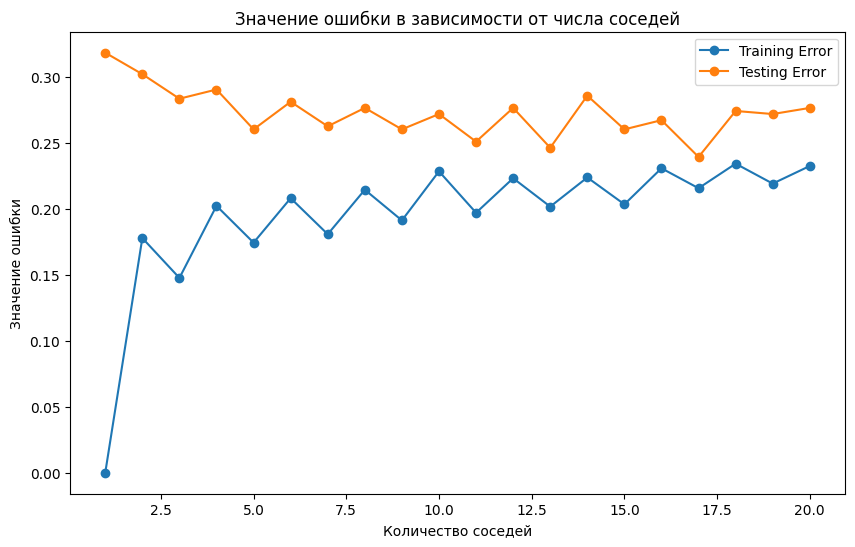

Оптимальное значение для количества соседей: 17


In [53]:
neighbor_range = range(1, 21)
train_errors = []
test_errors = []

for n in neighbor_range:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)

    # предсказания на обучающей и тестовой выборках
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # вычисление ошибок
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)

    train_errors.append(train_error)
    test_errors.append(test_error)
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Точность модели K-ближайших соседей при n = {n}: {accuracy:.4f}")


# построение графиков ошибок
plt.figure(figsize=(10, 6))
plt.plot(neighbor_range, train_errors, label="Training Error", marker='o')
plt.plot(neighbor_range, test_errors, label="Testing Error", marker='o')
plt.xlabel("Количество соседей")
plt.ylabel("Значение ошибки")
plt.title("Значение ошибки в зависимости от числа соседей")
plt.legend()
plt.show()

# оптимальное значение n_neighbors с минимальной тестовой ошибкой
optimal_n = neighbor_range[test_errors.index(min(test_errors))]
print(f"Оптимальное значение для количества соседей: {optimal_n}")


# Запуск классификатора случайного леса

Точность случайного леса при n_estimators=10:
Обучение: 0.9977, Тестирование: 0.8837
Точность случайного леса при n_estimators=30:
Обучение: 1.0000, Тестирование: 0.9209
Точность случайного леса при n_estimators=50:
Обучение: 1.0000, Тестирование: 0.9279
Точность случайного леса при n_estimators=70:
Обучение: 1.0000, Тестирование: 0.9302
Точность случайного леса при n_estimators=90:
Обучение: 1.0000, Тестирование: 0.9302
Точность случайного леса при n_estimators=110:
Обучение: 1.0000, Тестирование: 0.9326
Точность случайного леса при n_estimators=130:
Обучение: 1.0000, Тестирование: 0.9372
Точность случайного леса при n_estimators=150:
Обучение: 1.0000, Тестирование: 0.9349
Точность случайного леса при n_estimators=170:
Обучение: 1.0000, Тестирование: 0.9395
Точность случайного леса при n_estimators=190:
Обучение: 1.0000, Тестирование: 0.9395


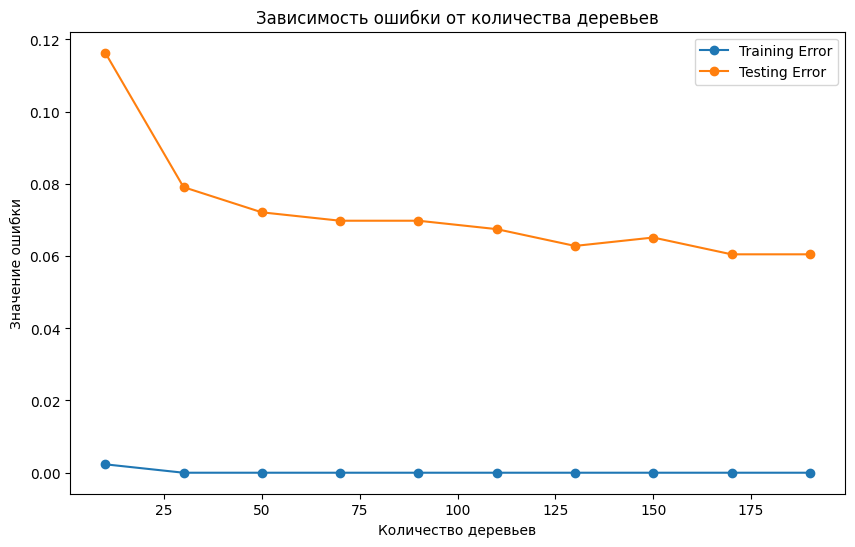

In [54]:
n_estimators_range = range(10, 210, 20)
train_errors_rf, test_errors_rf = [], []
for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)

    # предсказания и вычисление ошибок
    train_accuracy = accuracy_score(y_train, rf.predict(X_train))
    test_accuracy = accuracy_score(y_test, rf.predict(X_test))
    train_errors_rf.append(1 - train_accuracy)
    test_errors_rf.append(1 - test_accuracy)

    print(f"Точность случайного леса при n_estimators={n}:")
    print(f"Обучение: {train_accuracy:.4f}, Тестирование: {test_accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_errors_rf, label="Training Error", marker='o')
plt.plot(n_estimators_range, test_errors_rf, label="Testing Error", marker='o')
plt.xlabel("Количество деревьев")
plt.ylabel("Значение ошибки")
plt.title("Зависимость ошибки от количества деревьев")
plt.legend()
plt.show()

# Запуск классификатора метода опорных векторов

Точность метода опорных векторов при C=0.1:
Обучение: 0.7574, Тестирование: 0.7395
Точность метода опорных векторов при C=1:
Обучение: 0.9442, Тестирование: 0.8372
Точность метода опорных векторов при C=10:
Обучение: 0.9988, Тестирование: 0.8419
Точность метода опорных векторов при C=100:
Обучение: 1.0000, Тестирование: 0.8349


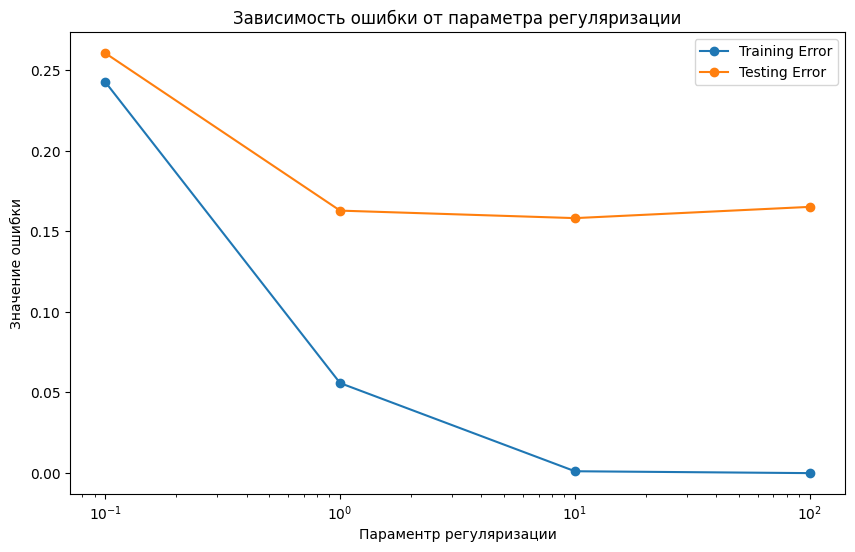

In [55]:
c_svc_range = [0.1, 1, 10, 100]
train_errors_svc, test_errors_svc = [], []
for c in c_svc_range:
    svc = SVC(C=c, kernel='rbf', random_state=42)
    svc.fit(X_train, y_train)

    # предсказания и вычисление ошибок
    train_accuracy = accuracy_score(y_train, svc.predict(X_train))
    test_accuracy = accuracy_score(y_test, svc.predict(X_test))
    train_errors_svc.append(1 - train_accuracy)
    test_errors_svc.append(1 - test_accuracy)

    print(f"Точность метода опорных векторов при C={c}:")
    print(f"Обучение: {train_accuracy:.4f}, Тестирование: {test_accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(c_svc_range, train_errors_svc, label="Training Error", marker='o')
plt.plot(c_svc_range, test_errors_svc, label="Testing Error", marker='o')
plt.xlabel("Параментр регуляризации")
plt.xscale("log")
plt.ylabel("Значение ошибки")
plt.title("Зависимость ошибки от параметра регуляризации")
plt.legend()
plt.show()

# Кластеризация методами KMeans, DBSCAN, агломеративной кластеризации, Spectral

In [56]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

dbscan = DBSCAN(eps=1.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(X_scaled)

spectral = SpectralClustering(n_clusters=2, random_state=42, affinity='nearest_neighbors')
spectral_labels = spectral.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


# Сравнение с истинными метками

In [57]:
true_labels = y.values

kmeans_ari = adjusted_rand_score(true_labels, kmeans_labels)
dbscan_ari = adjusted_rand_score(true_labels, dbscan_labels)
agglo_ari = adjusted_rand_score(true_labels, agglo_labels)
spectral_ari = adjusted_rand_score(true_labels, spectral_labels)

print(f"Adjusted Rand Index for KMeans: {kmeans_ari:.2f}")
print(f"Adjusted Rand Index for DBSCAN: {dbscan_ari:.2f}")
print(f"Adjusted Rand Index for Agglomerative Clustering: {agglo_ari:.2f}")
print(f"Adjusted Rand Index for Spectral Clustering: {spectral_ari:.2f}")

Adjusted Rand Index for KMeans: 0.14
Adjusted Rand Index for DBSCAN: -0.02
Adjusted Rand Index for Agglomerative Clustering: 0.01
Adjusted Rand Index for Spectral Clustering: 0.03


# Графическое представление кластеров (KMeans и DBSCAN)

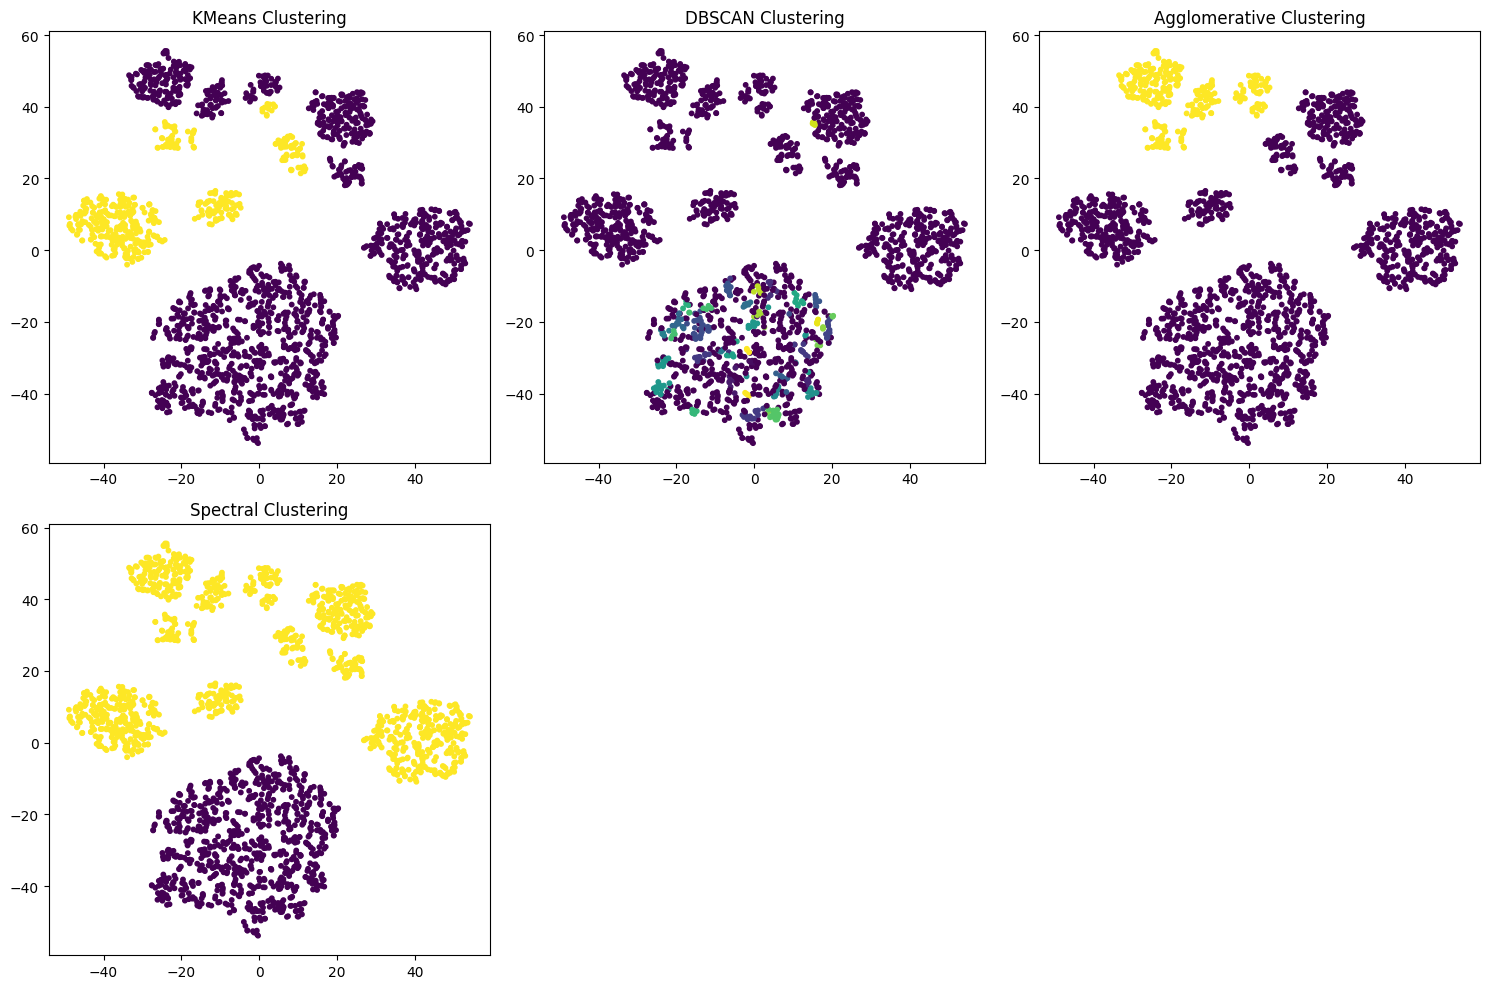

In [58]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title('KMeans Clustering')

plt.subplot(2, 3, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dbscan_labels, cmap='viridis', s=10)
plt.title('DBSCAN Clustering')

plt.subplot(2, 3, 3)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=agglo_labels, cmap='viridis', s=10)
plt.title('Agglomerative Clustering')

plt.subplot(2, 3, 4)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=spectral_labels, cmap='viridis', s=10)
plt.title('Spectral Clustering')

plt.tight_layout()
plt.show()

# Вывод
В рамках данной лабораторной работы были выполнены несколько последовательных этапов. Сначала был загружен CSV файл, который затем был обработан. Извлеченные данные подверглись нормализации, а также были вычислены и проанализированы основные характеристики. После этого данные были разделены на обучающую и тестовую выборки. Далее были запущены несколько классификаторов, включая KNN, случайный лес и SVC.

В итоге наилучшие результаты для данного набора данных продемонстрировал классификатор случайного леса, достигнув максимального значения accuracy = 0.9395, что существенно превосходит результаты алгоритмов KNN и SVC, чьи максимальные значения составили 0.7605 и 0.8419, соответственно.

Эти результаты показали, что различные гиперпараметры методов оказывают значительное влияние на качество работы моделей, и подбор оптимальных значений является важным этапом работы с каждым методом. Случайный лес продемонстрировал стабильность при оптимальном количестве деревьев, а SVM показал зависимость от параметра C. Эти выводы позволяют выбрать подходящий алгоритм в зависимости от требований к скорости обучения и способности модели к обобщению.

KMeans показал лучший результат среди методов с ARI = 0.14. Это говорит о том, что метод смог выделить кластеры, хоть и с низкой точностью. DBSCAN и Spectral Clustering дали низкие результаты из-за специфики данных и выбранных параметров. Агломеративная кластеризация также показала слабые результаты с ARI = 0.01. Применение t-SNE улучшило визуализацию кластеров, но реальное разделение данных остаётся сложным. Для дальнейшего улучшения стоит исследовать другие методы обработки признаков и оптимизации параметров кластеризации.